In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ltfs-av-data/test_bqCt9Pv.csv
/kaggle/input/ltfs-av-data/train.csv


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np

%matplotlib inline

> ****Import data


In [78]:
df= pd.read_csv('../input/ltfs-av-data/train.csv')
df1= pd.read_csv('../input/ltfs-av-data/test_bqCt9Pv.csv')

> Exploratory data analysis

In [79]:
df.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [44]:
df.shape

(233154, 41)

In [45]:
df1.shape

(112392, 40)

In [46]:
df1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


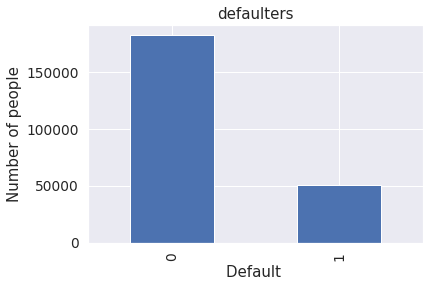

In [47]:
fig11=plt.figure()
ax11=plt.axes()
the_target = df['loan_default']
plt.title('defaulters')
ax11 = ax11.set(xlabel='Default ', ylabel='Number of people')
the_target.value_counts().plot.bar()
plt.show()

Renaming columns

In [80]:
df=df.rename(columns={'Date.of.Birth': 'Date_of_Birth','Employment.Type': 'Employment_Type', 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION'})
df1=df1.rename(columns={'Date.of.Birth': 'Date_of_Birth','Employment.Type': 'Employment_Type', 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION'})

Changing date of birth to age

In [81]:
now = pd.Timestamp('now')
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='%d-%m-%y')
df['Date_of_Birth'] = df['Date_of_Birth'].where(df['Date_of_Birth'] < now, df['Date_of_Birth'] -  np.timedelta64(100, 'Y'))
df['Age'] = (now - df['Date_of_Birth']).astype('<m8[Y]')
df=df.drop('Date_of_Birth',axis=1)

In [82]:
now = pd.Timestamp('now')
df1['Date_of_Birth'] = pd.to_datetime(df1['Date_of_Birth'], format='%d-%m-%y')
df1['Date_of_Birth'] = df1['Date_of_Birth'].where(df1['Date_of_Birth'] < now, df1['Date_of_Birth'] -  np.timedelta64(100, 'Y'))
df1['Age'] = (now - df1['Date_of_Birth']).astype('<m8[Y]')
df1=df1.drop('Date_of_Birth',axis=1)

Finding correlation of features with loan default

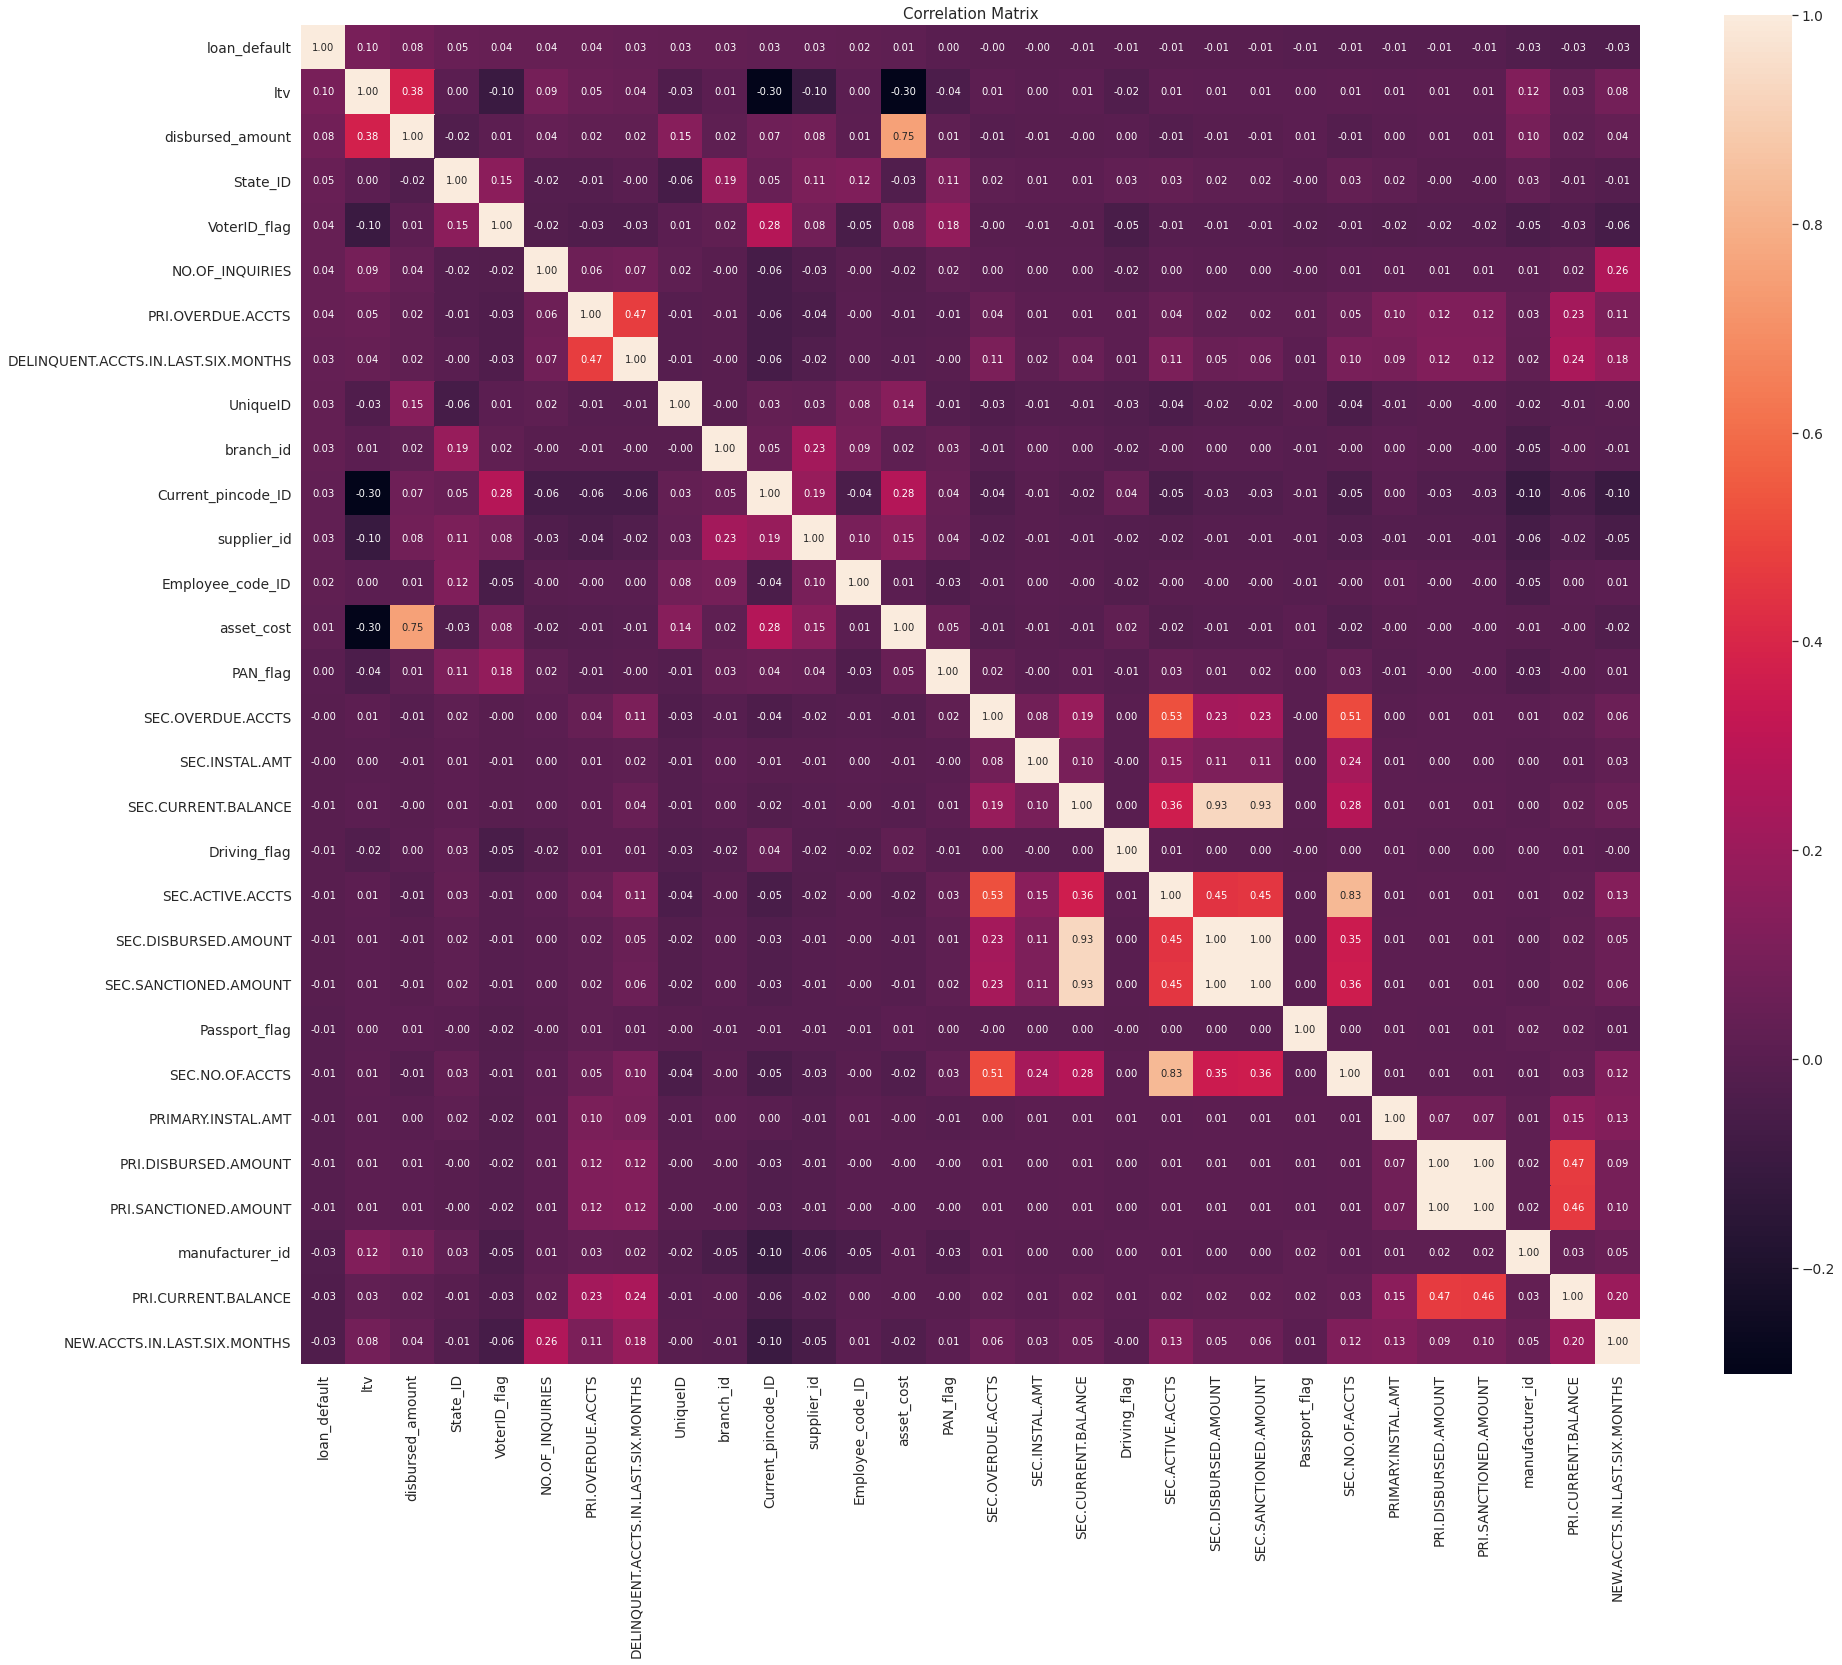

In [52]:
correlation_mat = df.corr()

fig2=plt.figure()
sns.set(rc={'figure.figsize':(30,25)})
k = 30
cols = correlation_mat.nlargest(k, 'loan_default')['loan_default'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix')
plt.show()

In [83]:
correlation_mat['loan_default'].sort_values(ascending = False)


loan_default                           1.000000
ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
Current_pincode_ID                     0.028419
supplier_id                            0.027357
Employee_code_ID                       0.020657
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0

In [54]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment_Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.AC

Droping features with less correlation

In [84]:
columns_to_drop = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','SEC.OVERDUE.ACCTS','PAN_flag','SEC.INSTAL.AMT','SEC.CURRENT.BALANCE','Driving_flag','SEC.ACTIVE.ACCTS','SEC.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT','Passport_flag','SEC.NO.OF.ACCTS','PERFORM_CNS_SCORE_DESCRIPTION']
df=df.drop(columns=columns_to_drop)

In [85]:
columns_to_drop = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','SEC.OVERDUE.ACCTS','PAN_flag','SEC.INSTAL.AMT','SEC.CURRENT.BALANCE','Driving_flag','SEC.ACTIVE.ACCTS','SEC.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT','Passport_flag','SEC.NO.OF.ACCTS','PERFORM_CNS_SCORE_DESCRIPTION']
df1=df1.drop(columns=columns_to_drop)

Encoding

In [86]:
def two_cat_encoding(df_to_transf):
    le = LabelEncoder()

    for cols in df_to_transf:
        if df_to_transf[cols].dtype == 'object':
            if len(list(df_to_transf[cols].unique())) == 2:
                le.fit(df_to_transf[cols])
                df_to_transf[cols] = le.transform(df_to_transf[cols])
    return df_to_transf
df=two_cat_encoding(df)

In [87]:
def two_cat_encoding(df1_to_transf):
    le = LabelEncoder()

    for cols in df1_to_transf:
        if df1_to_transf[cols].dtype == 'object':
            if len(list(df1_to_transf[cols].unique())) == 2:
                le.fit(df1_to_transf[cols])
                df1_to_transf[cols] = le.transform(df1_to_transf[cols])
    return df1_to_transf
df1=two_cat_encoding(df1)

In [60]:
df.shape

(233154, 25)

In [61]:
df1.shape

(112392, 24)

In [88]:
df = pd.get_dummies(df)
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Age', 'Employment_Type_Salaried',
       'Employment_Type_Self employed'],
      dtype='object')

In [89]:
df1 = pd.get_dummies(df1)
df1.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Age', 'Employment_Type_Salaried',
       'Employment_Type_Self employed'],
      dtype='object')

In [64]:
df.dtypes.value_counts()


int64      22
float64     2
uint8       2
dtype: int64

In [65]:
df1.dtypes.value_counts()


int64      21
float64     2
uint8       2
dtype: int64

In [ ]:
Creating model

In [90]:
X =df.drop('loan_default',axis=1)
y = df['loan_default']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Naive bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [74]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7782376530634127


Logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=1000)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred ))

Accuracy: 0.7851643756299458


Predicting loan defaults for test data

In [94]:

b = logisticRegr.predict(df1)

In [104]:
print(b)

[0 0 0 ... 0 0 0]
